In [1]:
#Importing required libraries
#Data Analysis libraries
import pandas as pd
import numpy as np


#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
#splitting data
from sklearn.model_selection import train_test_split


#Machine Learning model Algorithms
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import  LinearSVC
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

#performance metrics for classification model
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

import warnings
warnings.simplefilter("ignore")

print('Libray Loaded')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Libray Loaded


In [2]:
#Load the training data
data = pd.read_csv("/content/drive/MyDrive/train(1).csv")
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [3]:
data.shape

(595212, 59)

**Data** **Cleaning**

In [4]:
data.drop(['id'], axis=1, inplace=True)

In [5]:
#Checking for null values
data.isnull().sum()

target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0


There is no null values in the data set.

In [6]:
data["target"].unique()

array([0, 1])

In [7]:
data['ps_calc_10'].unique()

array([ 5,  7,  2, 12,  8, 10, 13, 11,  9, 18,  4, 15,  6, 14, 16,  3,  1,
       17,  0, 21, 19, 20, 22, 23, 25, 24])

**Check** **Description**

In [8]:
data.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829948,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375679,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.3687

**Checking** **for** **data** **is** **balanced** **or** **not**

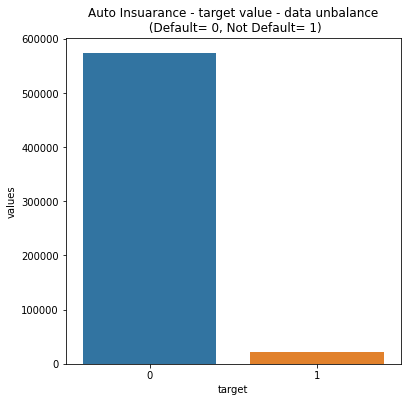

In [9]:
data1 = data['target'].value_counts()
df = pd.DataFrame({'target' : data1.index, 'values':data1.values})
plt.figure(figsize=(6,6))
plt.title('Auto Insuarance - target value - data unbalance\n (Default= 0, Not Default= 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'target', y='values', data=df)
locs, labels = plt.xticks()
plt.show()

Around 2% of clients will default next year. The data is unbalance with respect of the target value.

**#Feature Engineering and Visualization**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_

In [11]:
# Checking for numerical values in columns
columns = data.columns

num_col= [col for col in data.columns if data[col].dtypes!='O']
num_col

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

**Correlation for numeric values**

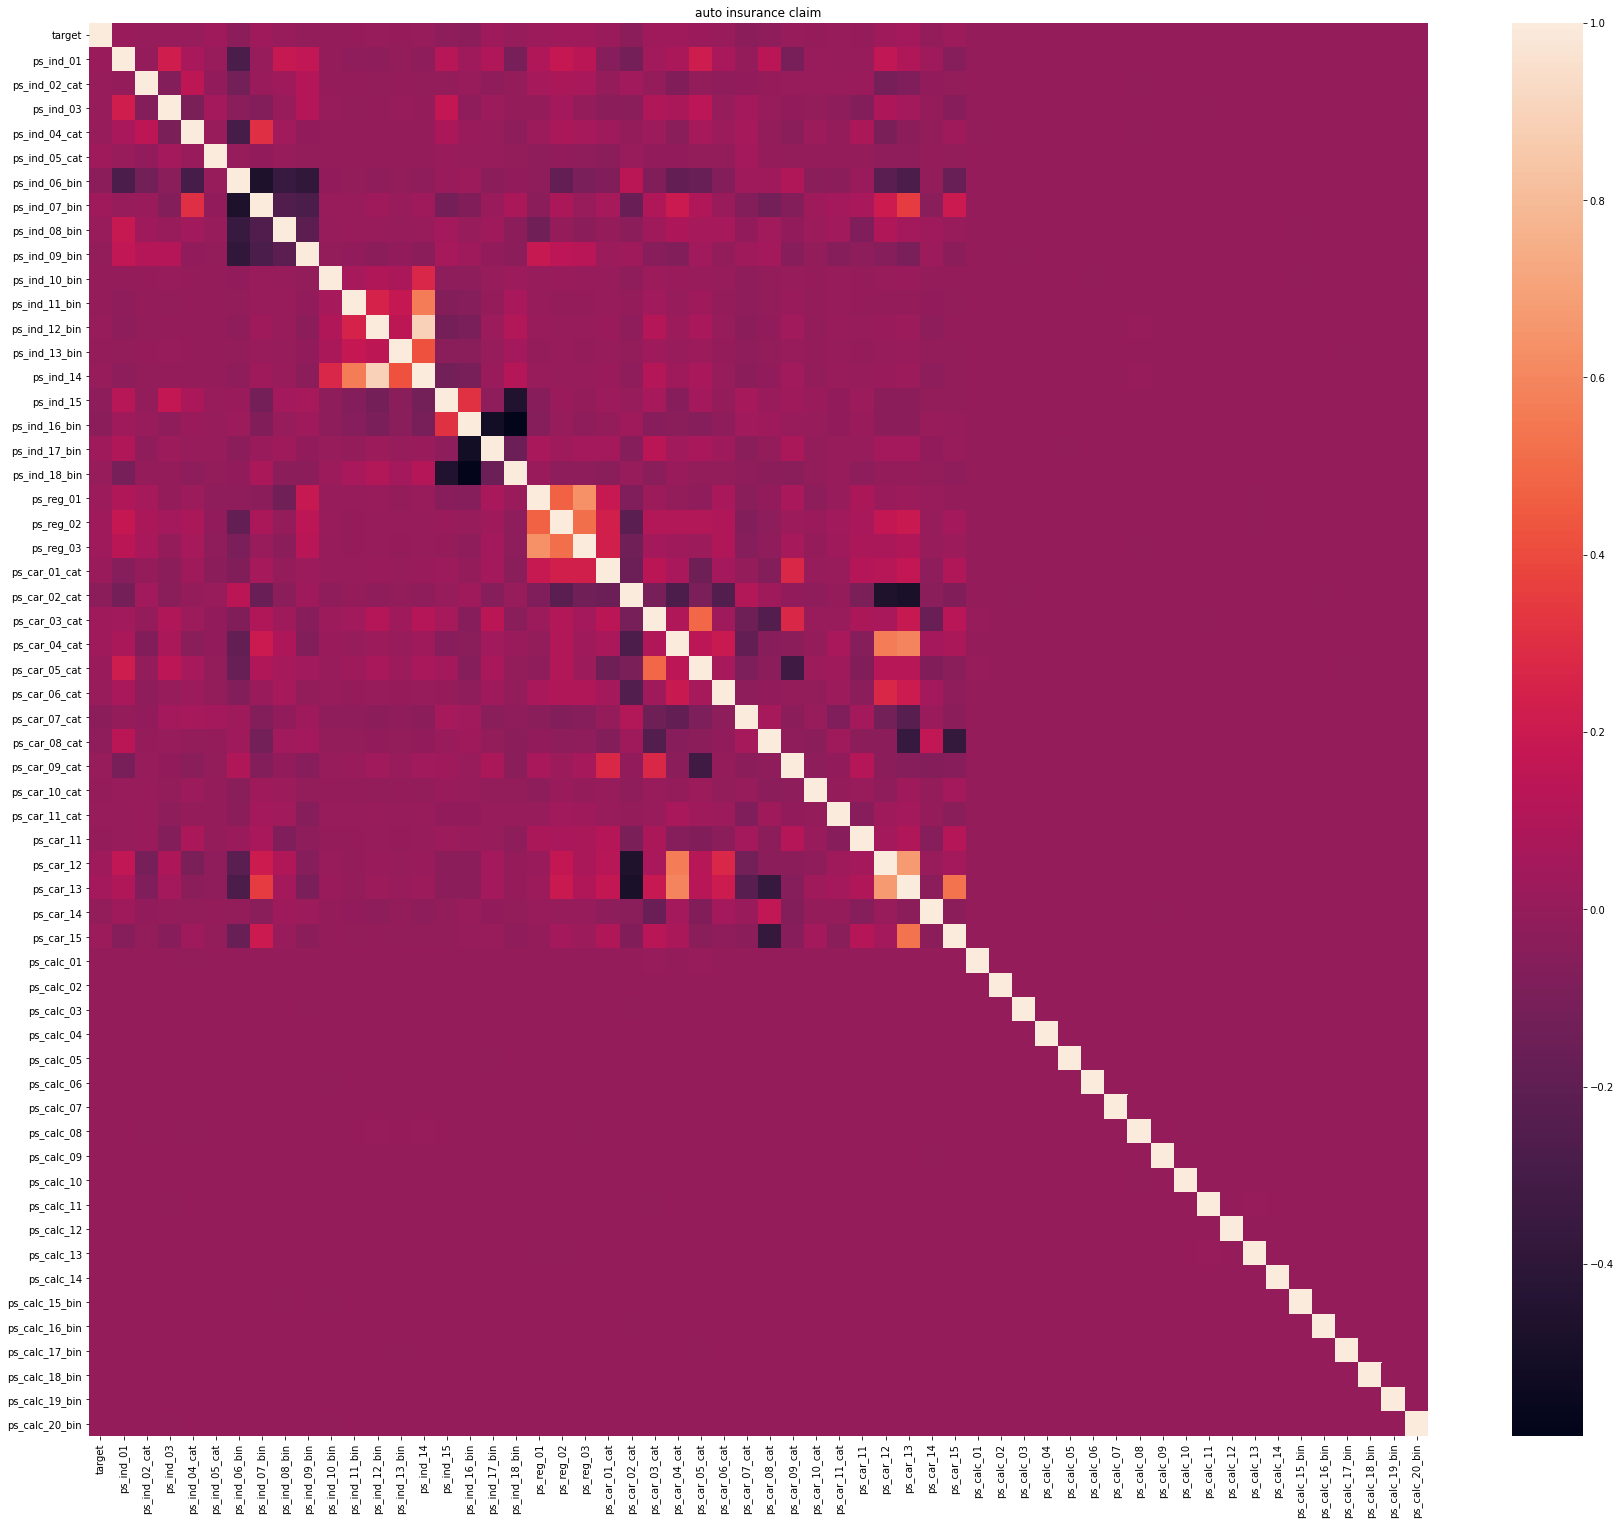

In [12]:
plt.figure(figsize=(30,26))
plt.title("auto insurance claim")
corr = data[columns].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()


In [13]:
corr

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031545,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116991,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045213,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044902,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003143,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,8.255181e-04,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,-0.000636,-0.001831,0.001313,-0.001013,0.012326,0.004315,0.007163,-0.008252,-0.017836,-0.009124,-0.019510,-0.036213,0.012913,-0.011399,-0.010873,-0.006562,-0.007230,0.053777,-0.002084,-0.008334,0.002168,-0.002250,0.001076,-0.016302,-0.015259,-0.001427,-0.006629,-0.001739,0.002379,-0.001560,1.291697e-03,-0.000642,-0.000249,-0.001902,-0.00

**Outlier Analysis**

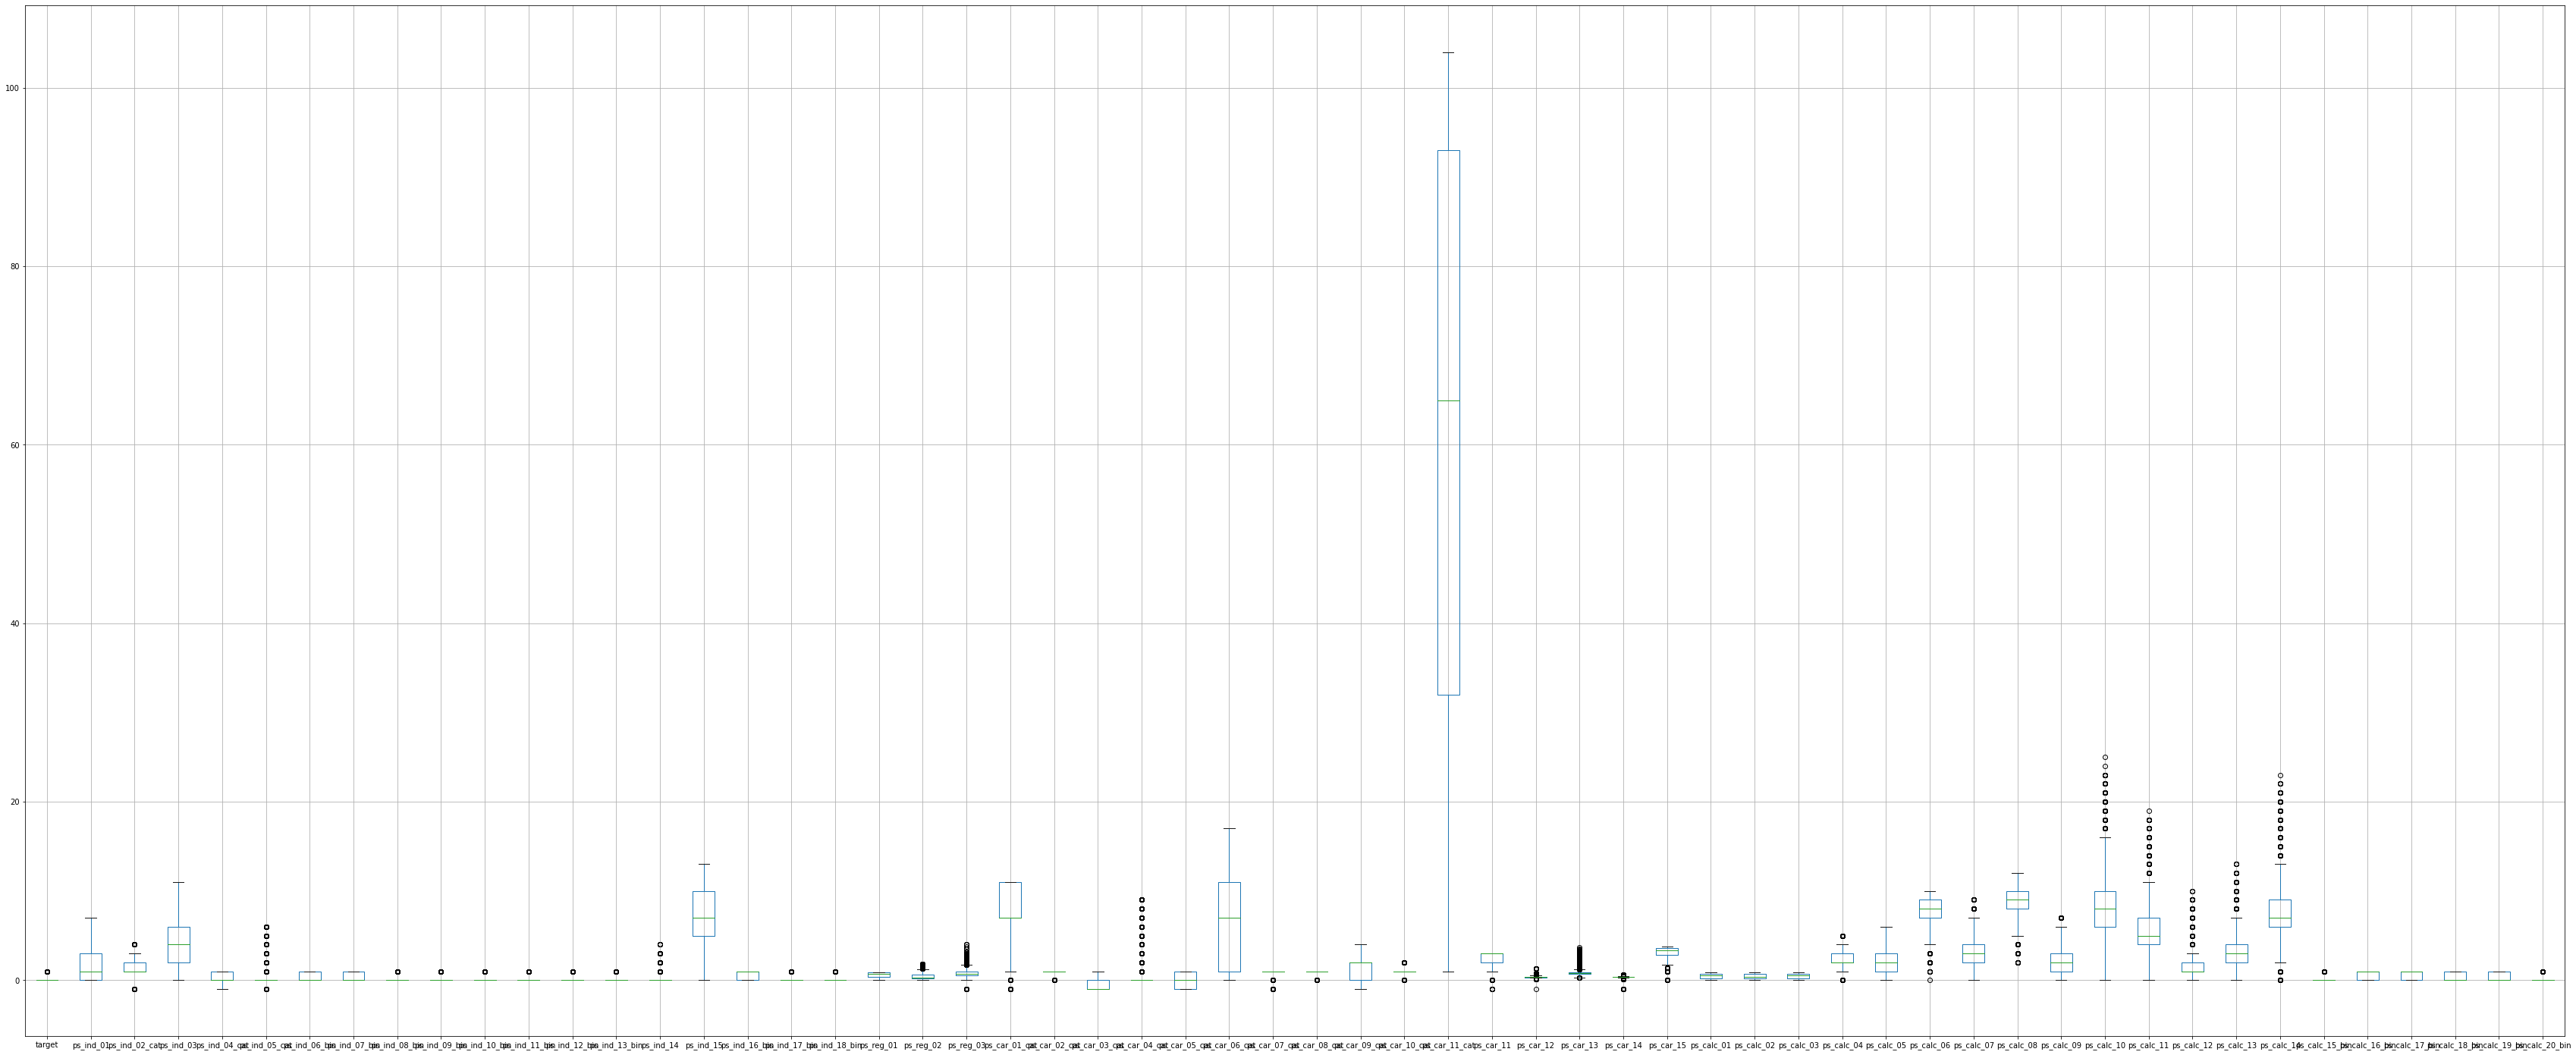

In [14]:
#Check outlier using box plot
plt.figure(figsize=(60,25))
data.boxplot()
plt.show()

**Feature Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']] =sc.fit_transform(data[['ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin','ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01','ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_04_cat','ps_car_05_cat','ps_car_06_cat','ps_car_07_cat','ps_car_08_cat','ps_car_09_cat','ps_car_10_cat','ps_car_11_cat','ps_car_11','ps_car_12','ps_car_13','ps_car_14','ps_car_15','ps_calc_01','ps_calc_02','ps_calc_03','ps_calc_04','ps_calc_05','ps_calc_06','ps_calc_07','ps_calc_08','ps_calc_09','ps_calc_10','ps_calc_11','ps_calc_12','ps_calc_13','ps_calc_14','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']])

In [16]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.043440,-1.395821,2.694238,-0.425746,0.309442,-0.591654,0.210419,0.679380,0.452653,-0.627780,-0.336757,1.371044,-0.464486,0.259209,-2.226032,-1.357747,0.085839,-1.521114,-0.415678,0.343841,0.313526,0.264742,0.737869,0.523136,0.175713,-0.870090,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,0,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,-1.212598,-1.395821,-0.371162,2.348817,0.657096,-0.096928,0.270919,1.078061,0.452653,-0.627780,-0.336757,-0.997456,0.807908,0.259209,0.449230,0.685684,0.085839,-1.309073,0.785455,-1.092413,-0.865800,0.314877,-0.842820,-0.521440,-1.218534,-0.521844,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,0,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.325445,0.716424,-0.371162,-0.425746,-2.124135,-1.086380,-1.954747,-0.516665,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,-0.067116,-1.616811,-1.092413,-0.764418,0.198847,0.342818,0.174944,0.872836,-1.218337,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,0,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.197425,0.716424,-0.371162,-0.425746,1.004750,-0.591654,0.037612,-0.516665,0.452653,0.640204,-0.336757,1.371044,0.807908,0.259209,0.449230,1.707399,0.085839,1.265715,-1.616811,-0.099081,-1.203608,0.052362,-1.457410,0.523136,1.569960,-1.218337,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,0,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.479430,0.716424,-0.371162,-0.425746,0.309442,0.397799,0.365035,1.078061,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,0.599299,0.785455,-1.095124,-1.101721,0.248762,-1.457410,-0.173248,0.524274,-1.566584,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537


**Divide target and features**

In [17]:
X = data.iloc[:,1:]
y = data['target']

**Create training and testing sets**

In [18]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.20, random_state = 21)

In [19]:
X_train.shape

(476169, 57)

In [20]:
X_test.shape

(119043, 57)

**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Predicting on X_test dataset
y_pred = lr.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision  Recall  F1 Score
0  Logistic Regression  0.963526        0.0     0.0       0.0


In [24]:
confusion_matrix(y_test, y_pred)

array([[114701,      0],
       [  4342,      0]])

**Apply SMOTE as data is unbalanced**

In [25]:
from imblearn.over_sampling import SMOTE

In [26]:
sm = SMOTE(random_state=589)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))

917634


In [27]:
lr1 = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr1.fit(X_SMOTE, y_SMOTE)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred1 = lr1.predict(X_test)
acc = accuracy_score(y_test, y_pred1)
prec = precision_score(y_test, y_pred1)
rec = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

model_results = pd.DataFrame([['Logistic Regression - with SMOTE', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978


In [29]:
confusion_matrix(y_test,y_pred1)

array([[67894, 46807],
       [ 1938,  2404]])

Accuracy has dipped but F1 score of the model has improved

**Apply Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Gini)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978
2               Random Forest(Gini)  0.963509   0.250000  0.000230   0.00046


In [31]:
clf_rf = RandomForestClassifier(criterion='entropy')
clf_rf.fit(X_train, y_train)

# Predicting Test Set
y_pred_rf = clf_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_results = pd.DataFrame([['Random Forest(Entropy)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978
2               Random Forest(Gini)  0.963509   0.250000  0.000230   0.00046
3            Random Forest(Entropy)  0.963501   0.000000  0.000000   0.00000


**Apply SVM**

In [32]:
from sklearn.svm import  LinearSVC
svm = LinearSVC(dual= True, max_iter=1000)
svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [33]:
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Support Vector Machine', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978
2               Random Forest(Gini)  0.963509   0.250000  0.000230   0.00046
3            Random Forest(Entropy)  0.963501   0.000000  0.000000   0.00000
4            Support Vector Machine  0.963526   0.000000  0.000000   0.00000


In [34]:
from sklearn.svm import  LinearSVC
svm = LinearSVC(dual= False, max_iter=2000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM after changing parameter', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978
2               Random Forest(Gini)  0.963509   0.250000  0.000230   0.00046
3            Random Forest(Entropy)  0.963501   0.000000  0.000000   0.00000
4            Support Vector Machine  0.963526   0.000000  0.000000   0.00000
5      SVM after changing parameter  0.963526   0.000000  0.000000   0.00000


**Apply XGBoost Classifier**

In [35]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predicting the test set
y_pred = model.predict(X_test)

In [36]:
# Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[114701,      0],
       [  4342,      0]])

In [37]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost Classifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000   0.00000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662   0.08978
2               Random Forest(Gini)  0.963509   0.250000  0.000230   0.00046
3            Random Forest(Entropy)  0.963501   0.000000  0.000000   0.00000
4            Support Vector Machine  0.963526   0.000000  0.000000   0.00000
5      SVM after changing parameter  0.963526   0.000000  0.000000   0.00000
6                XGBoost Classifier  0.963526   0.000000  0.000000   0.00000


**Apply MLPClassifier**

In [38]:
mlp = MLPClassifier(hidden_layer_sizes=(150, 100, 50, 50),
                    max_iter=160,
                    activation='relu',
                    solver='adam',
                    random_state=1,
                    verbose=2)

mlp.fit(X_train, y_train)
mlp_pred= mlp.predict(X_test)


Iteration 1, loss = 0.15571555
Iteration 2, loss = 0.15307142
Iteration 3, loss = 0.15237719
Iteration 4, loss = 0.15190949
Iteration 5, loss = 0.15126433
Iteration 6, loss = 0.15035155
Iteration 7, loss = 0.14922992
Iteration 8, loss = 0.14789034
Iteration 9, loss = 0.14642166
Iteration 10, loss = 0.14470068
Iteration 11, loss = 0.14317626
Iteration 12, loss = 0.14150205
Iteration 13, loss = 0.13982480
Iteration 14, loss = 0.13823215
Iteration 15, loss = 0.13653135
Iteration 16, loss = 0.13519726
Iteration 17, loss = 0.13350290
Iteration 18, loss = 0.13236164
Iteration 19, loss = 0.13082986
Iteration 20, loss = 0.12966911
Iteration 21, loss = 0.12865339
Iteration 22, loss = 0.12730218
Iteration 23, loss = 0.12635916
Iteration 24, loss = 0.12524607
Iteration 25, loss = 0.12449342
Iteration 26, loss = 0.12346564
Iteration 27, loss = 0.12254320
Iteration 28, loss = 0.12162953
Iteration 29, loss = 0.12054806
Iteration 30, loss = 0.12016857
Iteration 31, loss = 0.11926066
Iteration 32, los

In [39]:
acc = accuracy_score(y_test, mlp_pred)
prec = precision_score(y_test, mlp_pred)
rec = recall_score(y_test, mlp_pred)
f1 = f1_score(y_test, mlp_pred)

model_results = pd.DataFrame([['MLPClassifier', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)
print(results)

                              Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662  0.089780
2               Random Forest(Gini)  0.963509   0.250000  0.000230  0.000460
3            Random Forest(Entropy)  0.963501   0.000000  0.000000  0.000000
4            Support Vector Machine  0.963526   0.000000  0.000000  0.000000
5      SVM after changing parameter  0.963526   0.000000  0.000000  0.000000
6                XGBoost Classifier  0.963526   0.000000  0.000000  0.000000
7                     MLPClassifier  0.947406   0.061672  0.031092  0.041341


**Check Best Accuracy**

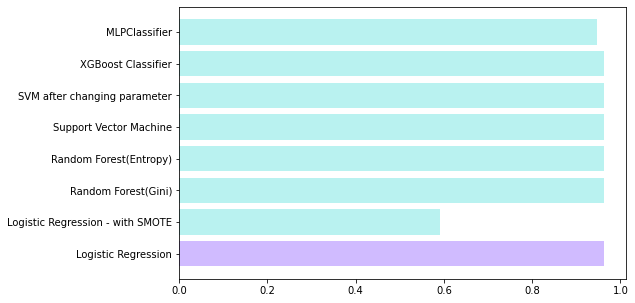

In [40]:
plt.figure(figsize=(8,5))
max_acc_index=results.Accuracy[results.Accuracy==results.Accuracy.max()].index[0]
plt.barh(results.Model,results.Accuracy,color='c')
plt.barh(results.Model[max_acc_index],results.Accuracy[max_acc_index],color='m')
plt.show()

**Check Best Precision**

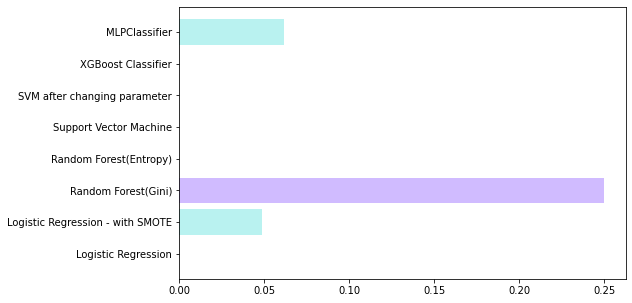

In [41]:
plt.figure(figsize=(8,5))
max_pre_index=results.Precision[results.Precision==results.Precision.max()].index[0]
plt.barh(results.Model,results.Precision,color='c')
plt.barh(results.Model[max_pre_index],results.Precision[max_pre_index],color='m')
plt.show()

**Check Best Recall**

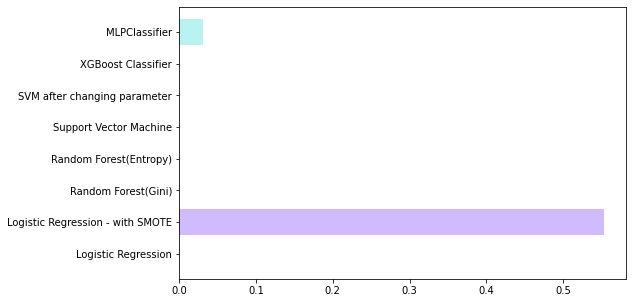

In [42]:
plt.figure(figsize=(8,5))
max_rc_index=results.Recall[results.Recall==results.Recall.max()].index[0]
plt.barh(results.Model,results.Recall,color='c')
plt.barh(results.Model[max_rc_index],results.Recall[max_rc_index],color='m')
plt.show()

**Best F1-Score**

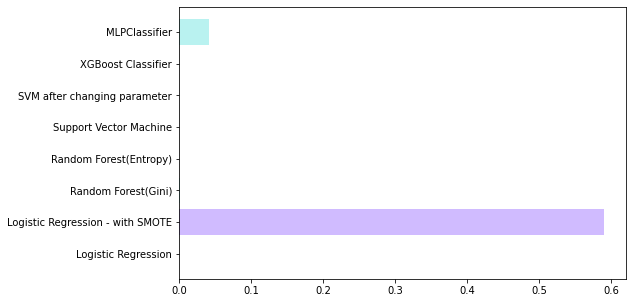

In [43]:
plt.figure(figsize=(8,5))
max_f1_index=results['F1 Score'][results['F1 Score']==results['F1 Score'].max()].index[0]
plt.barh(results.Model,results['F1 Score'],color='c')
plt.barh(results.Model[max_f1_index],results.Accuracy[max_f1_index],color='m')
plt.show()

**Exploratory Data Analysis**

In [44]:
# The data provides is unbalance. There is no null values in the dataset.
# A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples.
# There are no categorical features .
# In 'target' there is two (0,1) binary features.
# The highest possible value of an F-score is 1.0, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero. F1-score 0 being the worst possible and 1 being the best.
'''In given dataset there is no null values and the dataset is unbalanced. There is no categorical features in the dataset. For feature scaling I use Standardscaler, Beacuse StandardScaler removes the mean and scales each feature/variable to unit variance. 
This operation is performed feature-wise in an independent way. StandardScaler can be influenced by outliers (if they exist in the dataset) since it involves the estimation of the empirical mean and standard deviation of each feature.'''


**Modeling**

In [45]:
# The major limitation of Simple Logistic Regression is the assumption of linearity between the dependent variable and the independent variables. It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).
# The F1 score does this by calculating their harmonic mean, i.e. F1 := 2 / (1/precision + 1/recall). It reaches its optimum 1 only if precision and recall are both at 100%. And if one of them equals 0, then also F1 score has its worst value 0.
# The Precision and recall score for the model is
#         Model                    Precision    Recall  
# Logistic Regression -             0.000000  0.000000  
# Logistic Regression - with SMOTE  0.048851  0.553662 
# The Accuracy of model is good 0.962887 but other parameters (Recall, F1-score, Precision) values are worst.
# The Accuracy score and F1-score for improved Logistic Regression are
#                                    Accuracy      F1-score
# Logistic Regression -              0.963526     0.000000
# Logistic Regression - with SMOTE   0.590526     0.089780
# SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. It aims to balance class distribution by randomly increasing minority class.
#  For model LinearSVC play with parameters – dual, max_iter, there is no improvement 
# XGBoost is one the better classifiers -- but still f1-score is very low because The f1-score takes both precision and recall into account when devising a more general score.
# No,AdaBoost can not give any significant improvement over XGBoost. XGBoost was developed to increase speed and performance, while introducing regularization parameters to reduce overfitting. Gradient boosted trees use regression trees (or CART) in a sequential learning process as weak learners.
# To choose the right no. of layers and size, we will enumerate five approaches to solving this problem :-
 -Experimentation
 -Intuition
 -Go For Depth
 -Borrow Ideas
 -Search


**Conclusion**

In [47]:
# As the data is imbalance. Out of all the algorithms, we got best accuracy (96.28%), but the values of F1-score, recall, precision are worst
# Logistic Regression with SMOTE gives good F1-score, recall, precision but accuracy dipped.
# According to my model values of Accuracy, Precision, Recall, F1-scores for different models are below :-
                             Model  Accuracy  Precision    Recall  F1 Score
0               Logistic Regression  0.963526   0.000000  0.000000  0.000000
1  Logistic Regression - with SMOTE  0.590526   0.048851  0.553662  0.089780
2               Random Forest(Gini)  0.963509   0.250000  0.000230  0.000460
3            Random Forest(Entropy)  0.963501   0.000000  0.000000  0.000000
4            Support Vector Machine  0.963526   0.000000  0.000000  0.000000
5      SVM after changing parameter  0.963526   0.000000  0.000000  0.000000
6                XGBoost Classifier  0.963526   0.000000  0.000000  0.000000
7                     MLPClassifier  0.947406   0.061672  0.031092  0.041341